# E-Commerce_Shipping_Data in Kaggle

분류 신경망 빌딩 연습겸 배송이 예상된 시간 내에 도착을 했는지 안했는지 예측하는 모델을 만들어보았다.

https://www.kaggle.com/datasets/prachi13/customer-analytics

해당 데이터로 딥러닝을 통한 예측을 연습해보기로 했다.

In [1]:
# code for model save and load 

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print("numpy version:", np.__version__)
print("pandas version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

numpy version: 1.22.4
pandas version: 1.22.4
tensorflow version: 2.9.1
keras version: 2.9.0


In [3]:
# data load

raw_data = pd.read_csv('/Users/Angela/Desktop/Personal/toy1_물류/Train_E-Commerce_Shipping_Data.csv')
raw_data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [4]:
raw_data.shape

(10999, 12)

In [5]:
raw_data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Reached.on.Time_Y.N

##  crop columns
cost prediction에 필요할 것으로 생각되는 컬럼만 남긴다. 

In [6]:
# dataframe crop

df = raw_data[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
              'Cost_of_the_Product', 'Prior_purchases',
              'Product_importance' , 'Discount_offered', 'Weight_in_gms',
              'Reached.on.Time_Y.N']]

In [7]:
df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

## categorial columns processing (one-hot encoding)

Warehouse_block, Mode_of_Shipment, Product_importance

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Cost_of_the_Product  10999 non-null  int64 
 4   Prior_purchases      10999 non-null  int64 
 5   Product_importance   10999 non-null  object
 6   Discount_offered     10999 non-null  int64 
 7   Weight_in_gms        10999 non-null  int64 
 8   Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 773.5+ KB


# feature and target


참조: https://velog.io/@hyesoup/문자-카테고리형-데이터-처리-Label-Encoding-One-Hot-Encoding

시도하려고 했으나 훨씬 쉬운 방법을 알아냈다. 


```
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# items1 = df['Warehouse_block'].unique().tolist()
# # items2 = df['Mode_of_Shipment'].unique().tolist()
# # items3 = df['Product_importance'].unique().tolist()

# # 먼저 LabelEncoder로 변환 
# encoder = LabelEncoder()
# encoder.fit(items1)
# labels1 = encoder.transform(items1)

# # 2차원 데이터로 변환 
# labels1 = labels1.reshape(-1,1)

# # 원-핫 인코딩을 적용
# oh_encoder = OneHotEncoder()
# oh_encoder.fit(labels1)
# oh_labels1 = oh_encoder.transform(labels1)
```

In [9]:
df_onehot = pd.get_dummies(data = df, columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], 
                     prefix = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'])
df_onehot

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1
10995,4,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1
10996,5,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0
10997,5,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1


In [10]:
df_onehot.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

## target data one-hot encoding and then set the X and y

카테고리로 되어있는 데이터들을 원핫인코딩을 진행하기로 했다.

In [11]:
X = df_onehot[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium']]
y = df_onehot['Reached.on.Time_Y.N']

In [12]:
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y)
print(y_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## feature dimension 

In [13]:
print(X.shape)

(10999, 16)


## target data classes

타깃 데이터 종류를 확인하는 것으로 분류 문제인지 회귀 문제인지 구분할 수 있다. 연속형 숫자이기 때문에 회귀문제로 해결해야 함을 알 수 있다.

In [14]:
print(set(y))

{0, 1}


## Split Training and Test Data

In [15]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

# Building model

In [16]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [17]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 16개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 2개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 2개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 462
Trainable params: 422
Non-trainable params: 40
_________________________________________________________

## model compile

In [19]:
model.compile(loss = 'binary_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

## model learning

In [20]:
X.isna().sum()

Customer_care_calls          0
Cost_of_the_Product          0
Prior_purchases              0
Discount_offered             0
Weight_in_gms                0
Warehouse_block_A            0
Warehouse_block_B            0
Warehouse_block_C            0
Warehouse_block_D            0
Warehouse_block_F            0
Mode_of_Shipment_Flight      0
Mode_of_Shipment_Road        0
Mode_of_Shipment_Ship        0
Product_importance_high      0
Product_importance_low       0
Product_importance_medium    0
dtype: int64

중간에 트레이닝 데이터와 테스트 데이터 나누는데 원핫인코딩이 아니라 그냥 y를 넣는 바람에

```ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).```
이런 오류가 떠서 잠시 헤맸다.

In [21]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 10)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
825/825 [==============================] - 2s 2ms/step - loss: 0.6215 - accuracy: 0.6344
Epoch 2/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5731 - accuracy: 0.6421
Epoch 3/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5670 - accuracy: 0.6415
Epoch 4/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5630 - accuracy: 0.6427
Epoch 5/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5610 - accuracy: 0.6426
Epoch 6/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5621 - accuracy: 0.6476
Epoch 7/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.6541
Epoch 8/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.6438
Epoch 9/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5624 - accuracy: 0.6498
Epoch 10/30
825/825 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.6550

정확도가 일정 수준에서 더이상 상승하지 않아서 중단하고, 배치사이즈를 10으로 해본다.

# evaluation

정확도를 책정해본다.

In [22]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

258/258 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.6798
0.6798399686813354
86/86 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.6782
0.6781818270683289


좋은 결과는 아닌 것으로 보인다.

## Accuracy and loss rate

epoch 별로 그래프를 그리기 쉬워지도록 범위설정하는 arange 함수를 사용한다.

In [23]:
import numpy as np
epoch = np.arange(1, epo +1)               # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [24]:
accuracy = hist.history['accuracy']        # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(accuracy)

[0.6343799233436584, 0.6421384215354919, 0.641532301902771, 0.6427446007728577, 0.6426233649253845, 0.6475936770439148, 0.6541398763656616, 0.6438356041908264, 0.6497757434844971, 0.6549884676933289, 0.6532912850379944, 0.6577767133712769, 0.6501393914222717, 0.658504068851471, 0.6488059163093567, 0.655109703540802, 0.6546248197555542, 0.6554734110832214, 0.6540186405181885, 0.6517153382301331, 0.6555946469306946, 0.6580191254615784, 0.6568068861961365, 0.6548672318458557, 0.6572917699813843, 0.6589889526367188, 0.6512304544448853, 0.6515941619873047, 0.6491696238517761, 0.6586253046989441]


In [25]:
loss = hist.history['loss']                # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[0.621482789516449, 0.5731014013290405, 0.5670304298400879, 0.5629804134368896, 0.560951292514801, 0.5621375441551208, 0.5578861832618713, 0.5569666624069214, 0.5624240636825562, 0.5536582469940186, 0.5574585199356079, 0.549697995185852, 0.5511630177497864, 0.553798496723175, 0.5578076839447021, 0.5528833270072937, 0.5532510280609131, 0.5506796836853027, 0.5535212159156799, 0.5530017614364624, 0.5536129474639893, 0.5528913140296936, 0.5548198819160461, 0.5514050722122192, 0.5518854260444641, 0.5501344799995422, 0.553162693977356, 0.5533228516578674, 0.5527451634407043, 0.5494308471679688]


## Accuracy and loss rate visualization

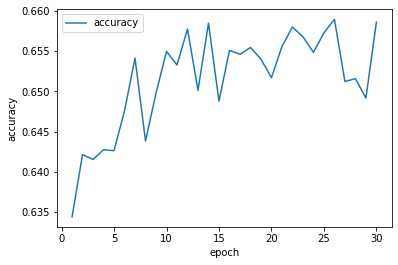

In [26]:
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

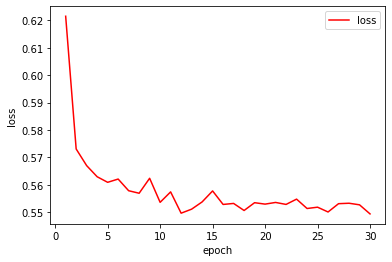

In [27]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# ver2. (Whole code)

중간에 활성화 함수를 하이퍼볼릭 탄젠트로 바꾸었다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                340       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
Total params: 462
Trainable params: 422
Non-trainable params: 40
_______________________________________________________

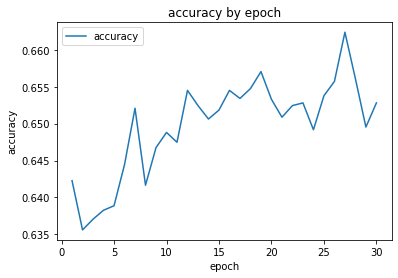

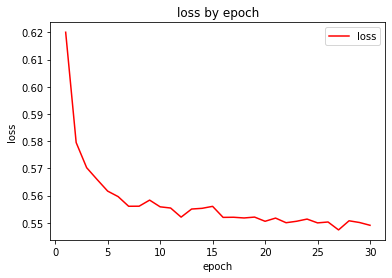

In [28]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 16개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 2개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model_tanh = Sequential()                # 초기 모형 생성.
model_tanh.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model_tanh.add(BatchNormalization())     # 배치 정규화
model_tanh.add(Activation('tanh'))       # 활성화 함수: 하이퍼볼릭 탄젠트
model_tanh.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 2개로 구분되도록.
model_tanh.add(Activation('softmax'))    # 활성화 함수 softmax

model_tanh.summary()

model_tanh.compile(loss = 'binary_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

hist = model_tanh.fit(X_tn, y_tn, epochs = epo, batch_size = 10)  # batch_size: learning mini batch size at one ephoch

# evaluation
print("-- model evaluate with train data --")
print(model.evaluate(X_tn, y_tn)[1])
print("-- model evaluate with test data --")
print(model.evaluate(X_te, y_te)[1])

# accuracy
import numpy as np
epoch = np.arange(1, epo +1)          # aragne 함수로 x축 설정
# print(epoch)
accuracy = hist.history['accuracy']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
# print(accuracy)
loss = hist.history['loss']           # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
# print(loss)


# visualization
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("accuracy by epoch")
plt.show()

plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title("loss by epoch")
plt.show()

### Commentary

정확도에 거의 차이가 나지 않는다. 우선 문제는, 여러 컬럼들을 모두 원핫 인코딩이 된 것도 아니오, 원핫 인코딩된 갯수가 너무 많기도 하다. 각각이 비슷한 비중을 갖는다고 생각하면 정말 문제가 많은 모형이라고 생각할 수 있다. 

데이터를 바꾸어서 진행해본다. 고객 관련한 정보(콜, 이전 주문, 할인 액수)를 지우고 진행해본다.

# ver3. modified X and relu

In [29]:
X = df_onehot[['Cost_of_the_Product', 'Weight_in_gms',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium']]
y = df_onehot['Reached.on.Time_Y.N']

In [30]:
y_hot = to_categorical(y)
print(y_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [31]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization_2 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 42        
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
Total params: 402
Trainable params: 362
Non-trainable params: 40
_______________________________________________________

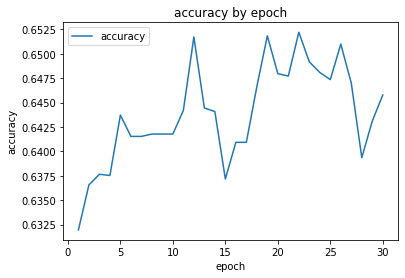

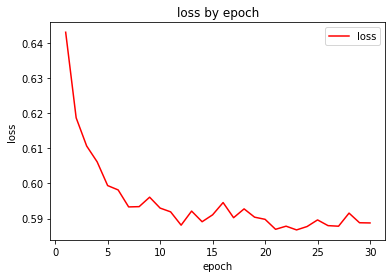

In [32]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 16개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 2개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model_tanh = Sequential()                # 초기 모형 생성.
model_tanh.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model_tanh.add(BatchNormalization())     # 배치 정규화
model_tanh.add(Activation('relu'))       # 활성화 함수: 하이퍼볼릭 탄젠트
model_tanh.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 2개로 구분되도록.
model_tanh.add(Activation('softmax'))    # 활성화 함수 softmax

model_tanh.summary()

model_tanh.compile(loss = 'binary_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

hist_tanh = model_tanh.fit(X_tn, y_tn, epochs = epo, batch_size = 10)  # batch_size: learning mini batch size at one ephoch

# evaluation
print("-- model evaluate with train data --")
print(model_tanh.evaluate(X_tn, y_tn)[1])
print("-- model evaluate with test data --")
print(model_tanh.evaluate(X_te, y_te)[1])

# accuracy
import numpy as np
epoch = np.arange(1, epo +1)          # aragne 함수로 x축 설정
# print(epoch)
accuracy = hist_tanh.history['accuracy']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
# print(accuracy)
loss = hist_tanh.history['loss']           # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
# print(loss)


# visualization
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("accuracy by epoch")
plt.show()

plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title("loss by epoch")
plt.show()

### Commentary

그래도 상승하지 않는 정확도...

데이터가 적기도 하고, 원래 이 데이터로 묻는 질문이 아니기도 했다. (customer score도 아니고...)

역시 더 상세한 정보(출발 시간, 도착예상 시간, 각각의 도시 등) 없이는 예상 시간내 도착 여부를 확인하기는 어려운것 같다.

다음은 스코어를 예측하는 것을 해보아야 겠다.